In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA as sk_pca
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv(r'D:\UNI STUFF\Stat\4th year\Units\Statistical Consultancy\Nuwani-s-main\abs.values.csv')

In [3]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data.drop("rep", axis=1, inplace=True)
data = data[data["mel.concentration"] != 100] ## remvoing 100% melamine concentration

In [4]:
data

,mel.concentration,450,451,452,453,454,455,456,457,458,...,5491,5492,5493,5494,5495,5496,5497,5498,5499,5500
0,1.00000,0.817173,0.823090,0.828494,0.832579,0.836819,0.840721,0.842007,0.843077,0.844834,...,0.029222,0.028978,0.029089,0.029124,0.029009,0.028883,0.028743,0.028610,0.028474,0.028339
1,1.00000,0.870290,0.879305,0.887936,0.895249,0.901034,0.904474,0.905860,0.904850,0.903598,...,0.025454,0.026062,0.026649,0.026906,0.027024,0.026704,0.026133,0.025696,0.025197,0.024731
2,1.00000,0.794354,0.800140,0.804544,0.807530,0.810700,0.813944,0.815503,0.815245,0.815271,...,0.013665,0.013977,0.014253,0.014385,0.014502,0.014449,0.014212,0.014001,0.013773,0.013554
3,1.00000,0.839491,0.846514,0.852457,0.856418,0.859817,0.862482,0.862647,0.854802,0.852024,...,0.025054,0.025475,0.025775,0.025826,0.025596,0.025148,0.024557,0.023909,0.023303,0.022909
4,0.50000,0.842431,0.850071,0.857295,0.863107,0.868124,0.872413,0.874575,0.876579,0.872134,...,0.024280,0.024674,0.025076,0.025060,0.024885,0.024010,0.025000,0.024899,0.024026,0.023926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.00025,0.865387,0.868443,0.868888,0.868791,0.872220,0.877928,0.881983,0.883173,0.883476,...,0.018814,0.018822,0.018693,0.018449,0.018102,0.017741,0.017478,0.017414,0.017456,0.017532
76,0.00000,0.838583,0.844759,0.850845,0.856175,0.861093,0.865823,0.862608,0.861499,0.862964,...,0.057406,0.056855,0.056365,0.056179,0.056180,0.056540,0.056503,0.057454,0.057120,0.055798
77,0.00000,0.848239,0.855200,0.860350,0.862773,0.864975,0.868541,0.865524,0.866482,0.870968,...,0.087328,0.090834,0.096156,0.101795,0.105752,0.106989,0.106109,0.104311,0.102428,0.100666
78,0.00000,0.891020,0.901354,0.911387,0.918040,0.922743,0.927090,0.932362,0.937033,0.942506,...,0.053694,0.052952,0.052324,0.051926,0.051888,0.052248,0.052584,0.052173,0.050774,0.048847


In [5]:
## making the labels (adulterated VS pure), 

adulterated = np.repeat(1, 72)
pure = np.repeat(0,4)
lab = np.append(adulterated, pure)
lab


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [6]:
# converting the features(wave numbers) to ndarray
feat = data.values[:,1:].astype('float32')
feat

array([[0.81717265, 0.8230898 , 0.82849437, ..., 0.02860999, 0.02847384,
        0.0283388 ],
       [0.87028974, 0.8793051 , 0.8879358 , ..., 0.02569648, 0.02519676,
        0.02473141],
       [0.7943537 , 0.80013955, 0.80454427, ..., 0.01400128, 0.01377271,
        0.01355415],
       ...,
       [0.8482385 , 0.8552003 , 0.86035043, ..., 0.10431144, 0.10242822,
        0.10066603],
       [0.89101964, 0.90135384, 0.91138667, ..., 0.0521731 , 0.05077352,
        0.04884675],
       [0.84635544, 0.85308087, 0.85931927, ..., 0.04302727, 0.04279615,
        0.04183116]], dtype=float32)

In [7]:
## Calculate first derivative applying a Savitzky-Golay filter to do the baseline correction
dfeat = savgol_filter(feat, 25, polyorder = 5, deriv=1)

## Numerical derivatives are generally unstable, so we use the smoothing filter implemented in scipy.signal import savgol_filter to smooth the derivative data out.

In [8]:
# Initializing the PCA functions
skpca1 = sk_pca(n_components=10)
skpca2 = sk_pca(n_components=10)

In [9]:
# Scale the features to have zero mean and standard devisation of 1
# This is important when correlating data with very different variances

scaler1 = StandardScaler()
scaler1 = scaler1.fit(feat) # done this to save the scaler
nfeat1 = scaler1.fit_transform(feat)

scaler2 = StandardScaler()
scaler2 = scaler2.fit(dfeat) # done this to save the scaler
nfeat2 = scaler2.fit_transform(dfeat)

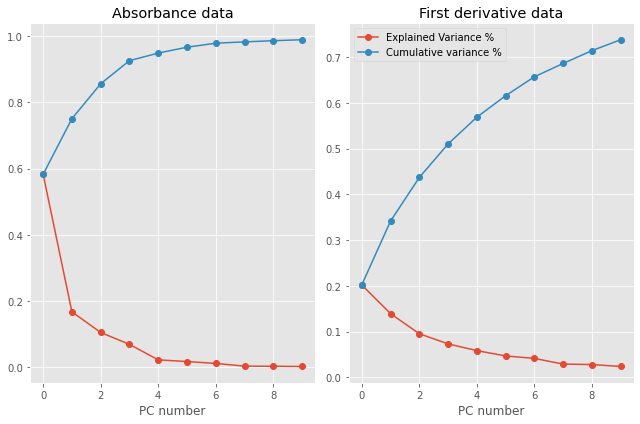

In [10]:
# Fit the spectral data and extract the explained variance ratio
X1 = skpca1.fit(nfeat1)
expl_var_1 = X1.explained_variance_ratio_
 
# Fit the first data and extract the explained variance ratio
X2 = skpca2.fit(nfeat2)
expl_var_2 = X2.explained_variance_ratio_
 
# Plot data
with plt.style.context(('ggplot')):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,6))
    fig.set_tight_layout(True)
 
    ax1.plot(expl_var_1,'-o', label="Explained Variance %")
    ax1.plot(np.cumsum(expl_var_1),'-o', label = 'Cumulative variance %')
    ax1.set_xlabel("PC number")
    ax1.set_title('Absorbance data')
 
    ax2.plot(expl_var_2,'-o', label="Explained Variance %")
    ax2.plot(np.cumsum(expl_var_2),'-o', label = 'Cumulative variance %')
    ax2.set_xlabel("PC number")
    ax2.set_title('First derivative data')
 
    plt.legend()
    plt.show()

Above is the plot of the explained variance and the cumulative variance of the first 10 principal components extracted from our data
Data plotted on the left hand side refer to the PCA applied to the original absorbance data. Data on the right hand side refer to PCA applied to the first derivative data.
Noise is amplified in the numerical derivative operation, and that is why we need to use a smoothing filter. The filter however doesn’t get rid of the noise completely.
Residual noise is uncorrelated from scan to scan, and it can’t therefore be accounted for using only a small number of principal components.
A good rule of thumb is to choose the number of principal components by looking at the cumulative variance of the decomposed spectral data, even though we will be generally using the first derivative data for more accurate classification.

In [11]:
#defining the PCA fn
skpca2 = sk_pca(n_components=4)
 
# Transform on the scaled features
Xt2 = skpca2.fit_transform(nfeat2)

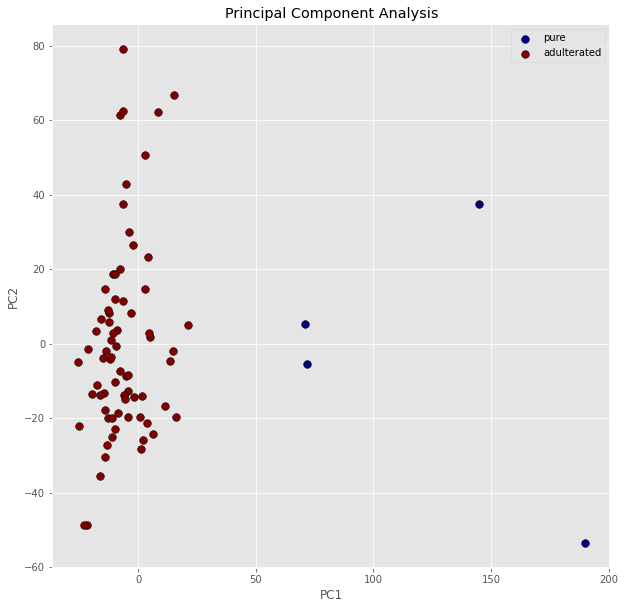

In [12]:
# Define the labels for the plot legend
labplot = ["pure", "adulterated"]
 
# Scatter plot
unique = list(set(lab))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
plt.figure(figsize=(10,10))
with plt.style.context(('ggplot')):
    for i, u in enumerate(unique):
        col = np.expand_dims(np.array(colors[i]), axis=0)
        xi = [Xt2[j,0] for j in range(len(Xt2[:,0])) if lab[j] == u]
        yi = [Xt2[j,1] for j in range(len(Xt2[:,1])) if lab[j] == u]
        plt.scatter(xi, yi, c=col, s=60, edgecolors='k',label=str(u))
 
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(labplot,loc='upper right')
    plt.title('Principal Component Analysis')
    plt.show()

In [13]:
## If PC1 is greater than 50, it can be classified as coming from Pure Animal Mix
PC_values_df = pd.DataFrame(Xt2)
PC_values_df


,0,1,2,3
0,-14.043430,-30.454481,3.464806,12.782815
1,4.870867,1.719575,-9.120972,-10.853279
2,0.892309,-19.752468,-8.152290,0.891807
3,-4.303863,-12.662143,-3.319575,5.598258
4,-12.145038,-4.172132,7.563940,7.400026
...,...,...,...,...
71,21.034105,4.917423,-29.396463,-51.307594
72,71.656967,-5.406128,-45.024639,27.637676
73,189.937943,-53.563484,127.933136,-21.901777
74,144.821121,37.622078,-82.147591,65.565475


Columns represent 4 PCs. Last 4 rows belongs values we get after projecting the original data of the pure animal mix to PCs. We can see that PC1 values are greater than 50 and hence we can easily classify a new data set as Pure or Adulterated if the value of PC1 is greater than 50.

## Checking the new test set for Adulterated VS Pure

In [14]:
test_df = pd.ExcelFile(r"D:\UNI STUFF\Stat\4th year\Units\Statistical Consultancy\Nuwani-s-main\Test Set Data.xls")
sheet_names = test_df.sheet_names
sheet_names = sheet_names[1:500]

In [15]:
df_list = []
for i in sheet_names:
    sub_df = pd.read_excel(r"D:\UNI STUFF\Stat\4th year\Units\Statistical Consultancy\Nuwani-s-main\Test Set Data.xls", sheet_name=i)
    df_list.append(sub_df)


df = pd.concat(df_list, axis=1)
df

,#Date: 2/13/2023 3:49:52 PM,Unnamed: 1,#Date: 2/13/2023 3:49:52 PM,Unnamed: 1,#Date: 2/13/2023 3:49:52 PM,Unnamed: 1,#Date: 2/13/2023 3:49:53 PM,Unnamed: 1,#Date: 2/13/2023 3:49:53 PM,Unnamed: 1,...,#Date: 2/14/2023 3:43:26 PM,Unnamed: 1,#Date: 2/14/2023 3:43:26 PM,Unnamed: 1,#Date: 2/14/2023 3:43:26 PM,Unnamed: 1,#Date: 2/14/2023 3:43:26 PM,Unnamed: 1,#Date: 2/14/2023 3:43:26 PM,Unnamed: 1
0,#Source: AEB-FTIR-937,NaN,#Source: AEB-FTIR-938,NaN,#Source: AEB-FTIR-939,NaN,#Source: AEB-FTIR-941,NaN,#Source: AEB-FTIR-942,NaN,...,#Source: AEB-FTIR-989,NaN,#Source: AEB-FTIR-990,NaN,#Source: AEB-FTIR-991,NaN,#Source: AEB-FTIR-992,NaN,#Source: AEB-FTIR-993,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#Data:,NaN,#Data:,NaN,#Data:,NaN,#Data:,NaN,#Data:,NaN,...,#Data:,NaN,#Data:,NaN,#Data:,NaN,#Data:,NaN,#Data:,NaN
4,cm-1,A,cm-1,A,cm-1,A,cm-1,A,cm-1,A,...,cm-1,A,cm-1,A,cm-1,A,cm-1,A,cm-1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,5496,0.009392,5496,0.007324,5496,0.016675,5496,0.016038,5496,0.016843,...,5496,0.004776,5496,0.008107,5496,0.004132,5496,0.003543,5496,0.006554
5052,5497,0.00938,5497,0.007296,5497,0.016666,5497,0.0166,5497,0.016734,...,5497,0.00476,5497,0.00813,5497,0.004117,5497,0.003521,5497,0.006547
5053,5498,0.009371,5498,0.007281,5498,0.01666,5498,0.016719,5498,0.017191,...,5498,0.004745,5498,0.008168,5498,0.004101,5498,0.003499,5498,0.006527
5054,5499,0.009366,5499,0.007275,5499,0.016638,5499,0.016511,5499,0.017292,...,5499,0.004732,5499,0.008158,5499,0.004101,5499,0.003487,5499,0.006508


In [16]:
wave_numers = data.columns.to_numpy()
wave_numers = np.delete(wave_numers,0)

In [17]:
df = df['Unnamed: 1']
df = df.iloc[5:]

In [18]:
df = df.T ## transforming the dataset so that columns represent wave numbers
df.columns = wave_numers ## assigning column names
df

,450,451,452,453,454,455,456,457,458,459,...,5491,5492,5493,5494,5495,5496,5497,5498,5499,5500
Unnamed: 1,0.090101,0.090264,0.09029,0.090402,0.09082,0.091355,0.091666,0.09171,0.091754,0.091947,...,0.009573,0.009559,0.009513,0.009456,0.009414,0.009392,0.00938,0.009371,0.009366,0.00936
Unnamed: 1,0.065924,0.066487,0.066279,0.066233,0.066349,0.066632,0.066891,0.067128,0.067419,0.067624,...,0.007467,0.007482,0.007472,0.007428,0.00737,0.007324,0.007296,0.007281,0.007275,0.007278
Unnamed: 1,0.145734,0.146857,0.147892,0.148563,0.149135,0.149794,0.150417,0.150822,0.149025,0.14881,...,0.016798,0.016846,0.016849,0.016791,0.016716,0.016675,0.016666,0.01666,0.016638,0.016623
Unnamed: 1,0.139314,0.139578,0.139557,0.139584,0.140112,0.140832,0.141172,0.141087,0.14096,0.140907,...,0.016382,0.016265,0.016177,0.016077,0.016111,0.016038,0.0166,0.016719,0.016511,0.016514
Unnamed: 1,0.13683,0.137837,0.138667,0.139067,0.139238,0.140265,0.138745,0.138776,0.139055,0.139287,...,0.017107,0.017082,0.01702,0.016949,0.016843,0.016843,0.016734,0.017191,0.017292,0.017151
Unnamed: 1,0.104265,0.105153,0.106023,0.106497,0.106634,0.107678,0.105693,0.105482,0.105531,0.105592,...,0.012963,0.012887,0.012788,0.012709,0.012606,0.012639,0.012518,0.013099,0.013217,0.013013
Unnamed: 1,0.074896,0.075868,0.076949,0.077389,0.078024,0.07608,0.076145,0.076224,0.076114,0.076257,...,0.009003,0.008956,0.00887,0.008794,0.008661,0.008647,0.008456,0.009111,0.009254,0.009026
Unnamed: 1,0.090272,0.091593,0.092793,0.093505,0.093852,0.095173,0.092201,0.091758,0.0921,0.092408,...,0.010509,0.010454,0.010352,0.010276,0.010167,0.010219,0.01006,0.010836,0.010995,0.010707
Unnamed: 1,0.07308,0.073706,0.074396,0.07497,0.075326,0.075437,0.075361,0.075314,0.075506,0.075779,...,0.006399,0.006379,0.006371,0.006369,0.006371,0.00637,0.006361,0.006222,0.006247,0.006264
Unnamed: 1,0.077228,0.077808,0.078039,0.078225,0.078574,0.078811,0.078668,0.07847,0.078735,0.079217,...,0.011646,0.011686,0.011661,0.011755,0.011673,0.011959,0.010729,0.010523,0.011072,0.011102


In [19]:
## extracting the features as ndarray
test_feat = df.values.astype("float32")

## doing the baseline correction
test_dfeat = savgol_filter(test_feat, 25, polyorder = 5, deriv=1)

In [20]:
test_dfeat

array([[ 4.4600161e-05,  1.3911906e-04,  2.0802717e-04, ...,
        -1.7439766e-05,  2.7657141e-05,  9.8886041e-05],
       [-3.7485202e-07,  5.9065926e-05,  1.0881174e-04, ...,
        -2.6105221e-05,  1.6028263e-05,  8.4684136e-05],
       [ 2.1610151e-03,  1.4594675e-03,  9.2731835e-04, ...,
        -3.3901502e-05,  9.6125495e-06,  8.4279862e-05],
       ...,
       [ 2.8909757e-04,  2.9705363e-04,  2.8409722e-04, ...,
        -2.5327577e-06, -3.1696469e-05, -7.4579271e-05],
       [ 5.0223578e-04,  4.4095039e-04,  3.7790902e-04, ...,
        -1.6955508e-05, -4.3780961e-05, -8.0947066e-05],
       [ 3.6464530e-04,  3.2784991e-04,  2.9052058e-04, ...,
        -5.8338169e-06, -2.9179308e-05, -6.4334083e-05]], dtype=float32)

In [21]:
## using the training scaler to transform
means = scaler2.mean_
stds = scaler2.scale_

scaler_test = StandardScaler()
scaler_test.mean_ = means
scaler_test.scale_ = stds

test_dfeat = scaler_test.transform(test_dfeat)

In [22]:
## projecting the features to PCs
Xt2_test = skpca2.fit_transform(test_dfeat)

In [23]:
Xt2_test_df = pd.DataFrame(Xt2_test)
Xt2_test_df.columns = ["PC1","PC2","PC3","PC4"]
Xt2_test_df

,PC1,PC2,PC3,PC4
0,-13.321107,0.978938,-3.879538,1.085393
1,-18.954472,-6.671336,-3.909667,2.249600
2,-4.825325,25.503714,-3.505655,-2.028783
3,-7.512637,26.748701,-3.381456,-1.093651
4,-7.874623,24.372261,-2.921243,2.755152
5,-16.796421,10.536306,-4.220048,3.277358
6,-23.769857,1.845465,-3.501734,3.810559
7,-21.193754,7.764716,-2.886752,3.592127
8,-12.238985,-5.880177,-3.013352,-0.641184
9,-2.020482,-9.198959,-1.905642,1.789304


Column one is for the PC1, we can see that none of the values are greater than 50, hence these data are adulterated.